In [1]:
import pandas as pd
from importlib import reload

from src import constants as C
from derived import preference_matching as PM
from src.viz import visualisations as V
from src.statistics.preference_correctness_tests import (
    correctness_by_pref_group_test,
)

reload(PM)

<module 'src.statistics.preference_matching' from 'C:\\Users\\deeth\\PycharmProjects\\QA_eyetracking\\src\\statistics\\preference_matching.py'>

In [2]:
hunters = pd.read_csv("../data/hunters.csv")
gatherers = pd.read_csv("../data/gatherers.csv")

In [4]:
both = pd.concat([hunters, gatherers])

In [5]:
trial_pref_dwell = PM.compute_trial_matching(
    both,
    metric_col=C.MEAN_DWELL_TIME,
    direction="high",
    extreme_mode="polarity",
)
trial_pref_dwell

,TRIAL_INDEX,participant_id,selected_label,pred_label,pref_group,is_correct,A,B,C,D
0,3,L41_408,A,A,matching,1,164.333333,91.166667,56.666667,58.250000
1,3,L56_481,A,B,not_matching,1,257.333333,530.000000,142.250000,161.000000
2,3,l10_202,B,B,matching,0,198.800000,353.000000,146.333333,185.000000
3,3,l10_338,B,B,matching,0,932.000000,1186.000000,375.166667,618.600000
4,3,l10_341,A,A,matching,1,247.333333,102.000000,76.000000,102.200000
...,...,...,...,...,...,...,...,...,...,...
19431,95,l5_175,A,A,matching,1,255.500000,226.555556,71.250000,65.166667
19432,95,l6_83,A,C,not_matching,1,97.142857,92.750000,105.235294,26.833333
19433,96,l5_175,A,A,matching,1,261.300000,79.700000,95.250000,104.100000
19434,98,l6_83,A,A,matching,1,83.833333,59.166667,76.333333,66.500000


In [6]:
trial_pref_rel_dt = PM.compute_trial_matching(
    both,
    metric_col=C.MEAN_DWELL_TIME,
    extreme_mode="relative",
)
trial_pref_rel_dt

,TRIAL_INDEX,participant_id,selected_label,pred_label,pref_group,is_correct,A,B,C,D
0,3,L41_408,A,A,matching,1,164.333333,91.166667,56.666667,58.250000
1,3,L56_481,A,B,not_matching,1,257.333333,530.000000,142.250000,161.000000
2,3,l10_202,B,B,matching,0,198.800000,353.000000,146.333333,185.000000
3,3,l10_338,B,B,matching,0,932.000000,1186.000000,375.166667,618.600000
4,3,l10_341,A,A,matching,1,247.333333,102.000000,76.000000,102.200000
...,...,...,...,...,...,...,...,...,...,...
19431,95,l5_175,A,A,matching,1,255.500000,226.555556,71.250000,65.166667
19432,95,l6_83,A,D,not_matching,1,97.142857,92.750000,105.235294,26.833333
19433,96,l5_175,A,A,matching,1,261.300000,79.700000,95.250000,104.100000
19434,98,l6_83,A,A,matching,1,83.833333,59.166667,76.333333,66.500000


In [7]:
base_cols = [
    C.TRIAL_ID,
    C.PARTICIPANT_ID,
    "selected_label",
    "pred_label",
    "pref_group",
    "A", "B", "C", "D",
]

df_pol = trial_pref_dwell[base_cols].rename(
    columns={
        "pred_label": "pred_label_polarity",
        "pref_group": "pref_group_polarity",
    }
)

df_rel = trial_pref_rel_dt[
    [
        C.TRIAL_ID,
        C.PARTICIPANT_ID,
        "pred_label",
        "pref_group",
    ]
].rename(
    columns={
        "pred_label": "pred_label_relative",
        "pref_group": "pref_group_relative",
    }
)

cmp = df_pol.merge(
    df_rel,
    on=[C.TRIAL_ID, C.PARTICIPANT_ID],
    how="inner",
)


diff = cmp[
    cmp["pref_group_polarity"] != cmp["pref_group_relative"]
]
diff


,TRIAL_INDEX,participant_id,selected_label,pred_label_polarity,pref_group_polarity,A,B,C,D,pred_label_relative,pref_group_relative
21,3,l17_48,A,A,matching,343.666667,312.000000,309.333333,137.750000,D,not_matching
26,3,l1_168,A,A,matching,182.200000,148.000000,80.153846,126.125000,C,not_matching
43,3,l25_106,A,A,matching,1162.000000,85.625000,295.000000,968.000000,B,not_matching
51,3,l27_377,C,B,not_matching,901.666667,926.333333,275.333333,300.000000,C,matching
61,3,l29_454,B,B,matching,305.250000,377.142857,114.428571,242.428571,C,not_matching
...,...,...,...,...,...,...,...,...,...,...,...
19390,85,l29_248,B,B,matching,144.142857,217.555556,172.125000,82.900000,D,not_matching
19396,86,l13_213,A,A,matching,194.888889,155.777778,188.818182,117.444444,D,not_matching
19399,86,l55_157,A,A,matching,255.200000,153.000000,51.833333,188.800000,C,not_matching
19402,87,l17_98,A,B,not_matching,30.000000,152.615385,132.083333,128.833333,A,matching


,pref_group,n_trials,n_correct,acc,ci_low,ci_high
0,matching,12093,10260,0.848425,0.841923,0.854705
1,not_matching,7343,6079,0.827863,0.819058,0.836326


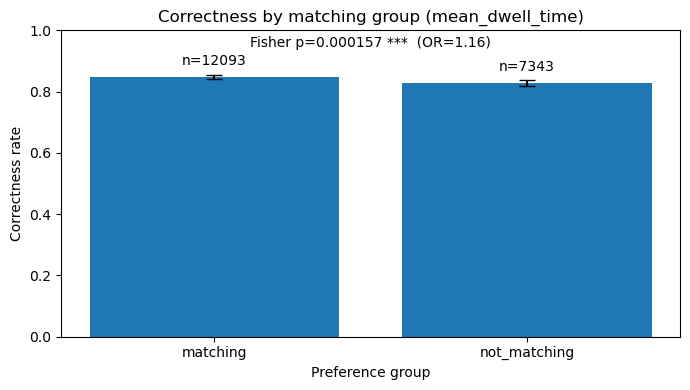

In [8]:
V.plot_correctness_by_matching(
    trial_pref_dwell,
    metric_name=C.MEAN_DWELL_TIME,
)

In [8]:
res = correctness_by_pref_group_test(trial_pref_dwell)
res

{'contingency_table': array([[10260,  1833],
        [ 6079,  1264]]),
 'odds_ratio': 1.1638575450512605,
 'p_value': 0.00015674001473360636,
 'counts': {'matching': {'correct': 10260, 'incorrect': 1833},
  'not_matching': {'correct': 6079, 'incorrect': 1264}}}